In [ ]:
import numpy
import scipy.stats
import seaborn
import pandas as pd
from scipy import stats

#seaborn.set_context('talk')
pd.set_option('display.float_format', '{:.2f}'.format)

# Distribución de estadísticos, TCL

## Generación de datos

1. Generamos 1 realización de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución conocida (mejor no normal). Por ejemplo: Poisson. Graficar la distribución de la muestra.

2. Luego tenemos 1 realización del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.



promedio de la muestra= 4.818 , una realización del estadístico media muestral


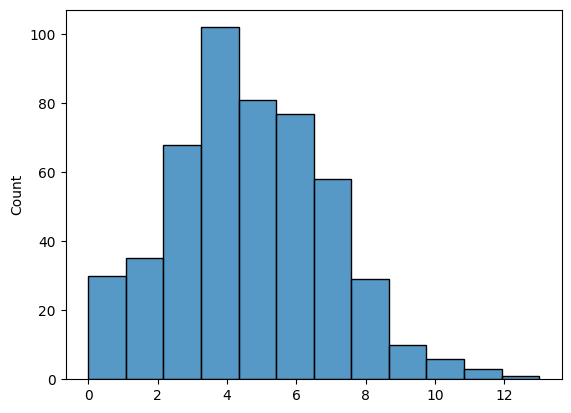

In [ ]:
# Generación de muestras de una distribución Poisson
n = 500
lambd = 5

sample = scipy.stats.poisson.rvs(lambd, size=n) #realización de una muestra aleatoria X_1,  ... X_n (de tamaño n)

seaborn.histplot(sample, bins=12)
print ('promedio de la muestra=', sample.mean(), ', una realización del estadístico media muestral')

1. Generamos m realizaciones de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución no normal. Por ejemplo: Poisson. Elegir una realización y graficar la distribución de la muestra.

2. Luego tendríamos N realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.

Graficar la distribución de estas realizaciones (de las medias muestrales). ¿Se parece a una distribución normal?

promedio de la muestra= 4.9988383333333335


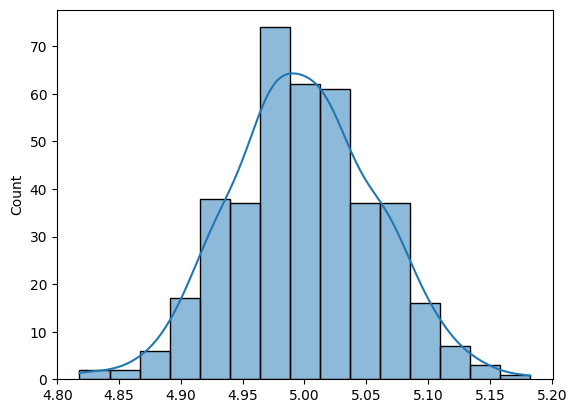

In [ ]:
# Generación de muestras de una distribución poisson

m = 400 #m filas, m realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 1500

lambd = 5
samples = scipy.stats.poisson.rvs(lambd, size=(m, n))
seaborn.histplot(samples.mean(axis=1), bins=15,kde=True)
print ('promedio de la muestra=', samples.mean(),)


Calculemos la distribución de las medias

In [ ]:
# Generación de muestras de una distribución exponencial
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
l = 5
s = 2
# media=l+s
# varianza=s^2
m = 100 #m filas, m realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 2000
samples = scipy.stats.expon.rvs(loc=l,scale=s,size=(m, n))

[7.94053463 5.5541599  5.83441603 6.76350513] ... [6.63550251 5.40968372 5.42647626 6.3195593 ]
media=  6.984960448712687


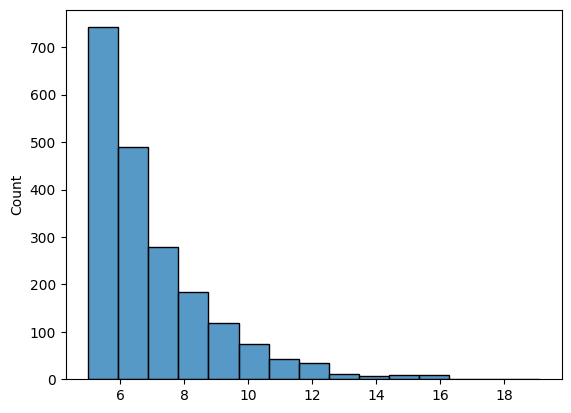

In [ ]:
#primera realización de la m.a.
print(samples[0][:4],'...', samples[0][-5:-1])

# Histograma de la i-ésima realización de la muestra
i=9
#seaborn.countplot(samples[i])
seaborn.histplot(samples[i], bins=15)
print('media= ', samples[i].mean())

In [ ]:
alpha = 0.05
z_value = stats.norm.ppf(1 - alpha/2)
media=samples[i].mean()
std=samples[i].std()
estadistico_liminf =media-(std*z_value/numpy.sqrt(n))
estadistico_limsup =media+(std*z_value/numpy.sqrt(n))
print(estadistico_liminf,estadistico_limsup)
print(estadistico_limsup-estadistico_liminf)

6.900168665612634 7.069752231812739
0.16958356620010484


In [ ]:
# Calculamos la media para cada una de las muestras.
sample_means = samples.mean(axis=1) #media de cada fila, tendremos m medias
sample_means.shape

(100,)

Veamos la distribución de las m realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$

Media de medias = 7.002627918243871
Varianza de medias = 0.0018181534019134904


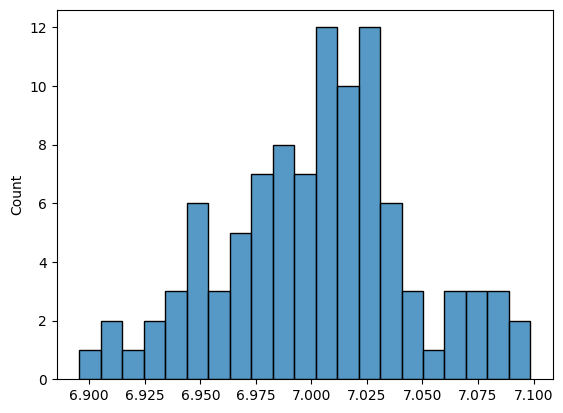

In [ ]:
seaborn.histplot(sample_means, bins=21)
print('Media de medias =', sample_means. mean())
print('Varianza de medias =', sample_means. var())

In [ ]:
# documentación de la función norm de scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Estima la media y el desvío (los parámetros de una normal)
media, std = scipy.stats.norm.fit(sample_means)
media, std, std**2

(np.float64(7.002627918243871),
 np.float64(0.042639810059538145),
 np.float64(0.0018181534019134904))

## Ejercicio 1

1. Analizar qué pasa cuando crece $n$ y ver la distribución de $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$ cuando $n\rightarrow \infty$ (el tamaño de la muestra). ¿Qué sucede con la varianza?

2. Realizar el mismo análisis con otra distribución no normal, por ejemplo, exponencial.

In [ ]:
# Escribir el código aquí


# VOLVER A CLASE

#Estimación puntual y por intervalos


### Distribución Normal

0. Fijar n=700
1. Dar un estimador puntual de la media de la distribución generada
2. Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha), calcular la longitud del intervalo.
3. Dar m=1000 realizaciones del **intervalo de confianza** para **la media** de nivel 0.95 y contar cuantos contienen a **la media** verdadera.
4. Incrementar n=4000 (por 4) y repetir el paso 2. Qué le pasó a la longitud el IC ?


In [ ]:
import numpy as np
from scipy import stats

# Parámetros de la distribución
mu = 100  # Media verdadera
sigma = 15  # Desviación estándar verdadera
alpha = 0.05  # Nivel de significación
n = 700  # Tamaño muestral inicial
m = 1000  # Número de realizaciones para el punto 3

# 0. Fijar semilla para reproducibilidad
np.random.seed(42)

# 1. Estimador puntual de la media

# Generar una muestra de tamaño n
muestra = np.random.normal(mu, sigma, n)
estimador_puntual = np.mean(muestra)
print(f"1. Estimador puntual de la media: {estimador_puntual:.2f}")

# 2. Intervalo de confianza para la media (nivel 0.95)

# Error estándar
se = sigma / np.sqrt(n)  # Usamos sigma conocida; si no, usar np.std(muestra, ddof=1)
# Valor crítico para 95% (z-score, ya que sigma es conocida)
z_crit = stats.norm.ppf(1 - alpha / 2)

# Margen de error
margen_error = z_crit * se

# Intervalo de confianza
ic_inferior = estimador_puntual - margen_error
ic_superior = estimador_puntual + margen_error
longitud_ic = ic_superior - ic_inferior
print(f"2. Intervalo de confianza (n={n}): ({ic_inferior:.2f}, {ic_superior:.2f})")
print(f"   Longitud del intervalo: {longitud_ic:.2f}")

# 3. m=1000 realizaciones del intervalo de confianza
contiene_mu = 0
for _ in range(m):
    # Generar nueva muestra
    muestra = np.random.normal(mu, sigma, n)
    media_muestral = np.mean(muestra)
    se = sigma / np.sqrt(n)
    margen_error = z_crit * se
    ic_inferior = media_muestral - margen_error
    ic_superior = media_muestral + margen_error
    # Verificar si el intervalo contiene la media verdadera
    if ic_inferior <= mu <= ic_superior:
        contiene_mu += 1
proporcion = contiene_mu / m
print(f"3. Proporción de intervalos que contienen la media verdadera (m={m}): {proporcion:.3f}")

# 4. Incrementar n=4000 y repetir el paso 2
n = 4000
muestra = np.random.normal(mu, sigma, n)
estimador_puntual = np.mean(muestra)
se = sigma / np.sqrt(n)
margen_error = z_crit * se
ic_inferior = estimador_puntual - margen_error
ic_superior = estimador_puntual + margen_error
longitud_ic_nuevo = ic_superior - ic_inferior
print(f"4. Intervalo de confianza (n={n}): ({ic_inferior:.2f}, {ic_superior:.2f})")
print(f"   Longitud del intervalo: {longitud_ic_nuevo:.2f}")
print(f"   La longitud del intervalo disminuyó porque el tamaño muestral aumentó, reduciendo el error estándar.")

1. Estimador puntual de la media: 99.88
2. Intervalo de confianza (n=700): (98.77, 100.99)
   Longitud del intervalo: 2.22
3. Proporción de intervalos que contienen la media verdadera (m=1000): 0.949
4. Intervalo de confianza (n=4000): (99.56, 100.49)
   Longitud del intervalo: 0.93
   La longitud del intervalo disminuyó porque el tamaño muestral aumentó, reduciendo el error estándar.


## Ejercicio 2: Estimadores puntuales y por intervalos

- a) Distribución Poisson
- b) Distribución Exponencial

0. Fijar n=700
1. Dar un estimador puntual de la media de la distribución generada
2. Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha), calcular la longitud del intervalo.
3. Dar m=1000 realizaciones del **intervalo de confianza** para **la media** de nivel 0.95 y contar cuantos contienen a **la media** verdadera.
4. Incrementar n=4000 (por 4) y repetir el paso 2. Qué le pasó a la longitud el IC ?


In [ ]:
# Escribir el código aquí


##  Ejercicio 3: Estimadores puntuales y por intervalos sobre  la variable salario bruto y neto

1.  Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha) de la variable media del salario, calcular la longitud del intervalo.
2. Rehacer sacando los outliers (cero y 4.5 millon)
3. calcular intervalos para el salario neto.

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

#seaborn.set_context('talk')
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)
salary_col='salary_monthly_BRUTO' #defino variable con el nombre de la columna de interés



#filtered_df= df[df[salary_col] < 2500000]
#filtered_df= filtered_df[filtered_df[salary_col] > 0]

In [ ]:
n=len(df[salary_col])
alpha = 0.05
z_value = stats.norm.ppf(1 - alpha/2)

In [ ]:
media=np.mean(df[salary_col])
std = np.std(df[salary_col])



In [ ]:
estadistico_liminf =media-(std*z_value/np.sqrt(n))
estadistico_limsup =media+(std*z_value/np.sqrt(n))
print(estadistico_liminf,estadistico_limsup)
print(estadistico_limsup-estadistico_liminf)

2680022.1423604595 2776823.3136326117
96801.1712721521


## Ejercicio 4
Hacer un análisis de las diferencias de medias de los salarios brutos entre hombres y mujeres.

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd

# Cargar datos desde GitHub
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)
df.loc[:,'profile_g'] = df.profile_gender.replace({'Hombre Cis': 'Varón cis','Mujer Cis': 'Mujer cis','Queer':'Diversidades','Trans':'Diversidades','Queer':'Diversidades','Lesbiana':'Diversidades','Agénero':'Diversidades'}).fillna(False)

is_man = df.profile_g == 'Varón cis'
is_woman = df.profile_g == 'Mujer cis'

# Datos de ejemplo
salarios_hombres = df[(df.salary_monthly_BRUTO > 100000) & is_man].salary_monthly_BRUTO
salarios_mujeres  = df[(df.salary_monthly_BRUTO > 100000) & is_woman].salary_monthly_BRUTO

alpha = 0.05  # Nivel de significación (1 - alpha = 95% confianza)

# Calcular medias y desviaciones estándar
x_h = np.mean(salarios_hombres)  # Media hombres
x_m = np.mean(salarios_mujeres)  # Media mujeres
s_h = np.std(salarios_hombres, ddof=1)  # Desviación estándar hombres
s_m = np.std(salarios_mujeres, ddof=1)  # Desviación estándar mujeres
n_h = len(salarios_hombres)  # Tamaño muestral hombres
n_m = len(salarios_mujeres)  # Tamaño muestral mujeres

# Estimación puntual
diff_medias = x_h - x_m
print(f"Estimación puntual de la diferencia de medias (Hombres - Mujeres): {diff_medias:.2f}")

# Intervalo de confianza usando t de Welch (no asume varianzas iguales)
# Error estándar de la diferencia
se_diff = np.sqrt((s_h**2 / n_h) + (s_m**2 / n_m))

# Grados de libertad (aproximación de Welch)
df = ((s_h**2 / n_h + s_m**2 / n_m)**2) / (((s_h**2 / n_h)**2 / (n_h - 1)) + ((s_m**2 / n_m)**2 / (n_m - 1)))

# Valor crítico para el intervalo de confianza
t_crit = stats.t.ppf(1 - alpha / 2, df)

# Margen de error
margen_error = t_crit * se_diff

# Intervalo de confianza
ic_inferior = diff_medias - margen_error
ic_superior = diff_medias + margen_error
print(f"Intervalo de confianza al {100*(1-alpha)}%: ({ic_inferior:.2f}, {ic_superior:.2f})")




Estimación puntual de la diferencia de medias (Hombres - Mujeres): 567229.55
Intervalo de confianza al 95.0%: (463780.65, 670678.45)
